<a href="https://colab.research.google.com/github/shisiajoy/drafts/blob/main/malaria_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Check GPU type
!nvidia-smi

Thu Nov  7 09:18:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Install ultralytics
!pip -q install  ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 3.9 MB/s eta 0:00:00


## IMPORTS


In [3]:
# Import libraries
import pandas as pd
import os
from pathlib import Path
import shutil
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import cv2
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO
import multiprocessing
import zipfile


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [15]:
# Define main project directory and data folder
project_dir = '/content/project_directory'
data_dir = os.path.join(project_dir, 'data')
images_dir = os.path.join(data_dir, 'images')

# Create directories
os.makedirs(images_dir, exist_ok=True)


In [ ]:
# Path to the images zip file in Google Drive
zip_path = '/content/drive/MyDrive/images.zip'

# Unzip images
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(images_dir)


In [14]:
# Paths to CSV
train_csv = '/content/Train.csv'
test_csv= '/content/Test.csv'

# Move CSV files to the data directory
shutil.copy(train_csv, data_dir)
shutil.copy(test_csv, data_dir)


'/content/project_directory/data/Test.csv'

In [7]:
# List contents of main project directory
print("Project directory contents:", os.listdir(project_dir))
print("Data directory contents:", os.listdir(data_dir))
print("Images directory contents:", os.listdir(images_dir)[:5])  # Show first 5 files


Project directory contents: ['data']
Data directory contents: ['Test.csv', 'Train.csv', 'images']
Images directory contents: ['id_5ro2oj1np6.jpg', 'id_yqktkut167.jpg', 'id_u0zo11m6nf.jpg', 'id_w7ffbt8mn3.jpg', 'id_n43eeu01e8.jpg']


In [11]:
# Load CSV files into pandas DataFrames
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

In [12]:
# Display the first few rows of the training and testing data
print("Training Data Preview:")
train_df.head()

print("\nTesting Data Preview:")
test_df.head()

Training Data Preview:

Testing Data Preview:


,Image_ID,class,confidence,ymin,xmin,ymax,xmax
0,id_5n9ov0rr22.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1,id_k6s11k3klo.jpg,NaN,NaN,NaN,NaN,NaN,NaN
2,id_eftvcf9djb.jpg,NaN,NaN,NaN,NaN,NaN,NaN
3,id_kc5tmoj1xa.jpg,NaN,NaN,NaN,NaN,NaN,NaN
4,id_tirid4qt68.jpg,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
file_path = '/content/drive/MyDrive/images.zip'


In [ ]:
import zipfile

# Path to your zip file in Google Drive
zip_path = '/content/drive/MyDrive/images.zip'

# Open the zip file and list contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()  # Get list of files in the zip
    print("Files in the ZIP archive:")
    for file in file_list:
        print(file)


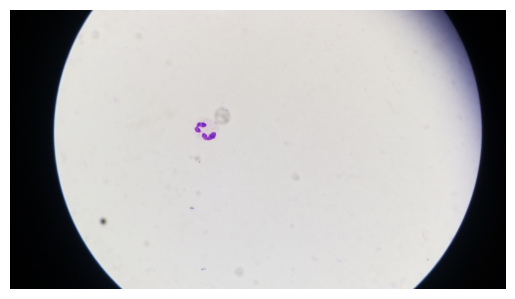

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Display a sample image (update 'sample_image.jpg' with the actual name)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    sample_file = file_list[0]  # Choose the first image or any specific file
    with zip_ref.open(sample_file) as file:
        image = Image.open(file)
        plt.imshow(image)
        plt.axis('off')
        plt.show()


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import zipfile

# Path to your zip file in Google Drive
zip_path = '/content/drive/MyDrive/images.zip'

# Open the zip file and display multiple sample images
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()  # Get list of files in the zip

    # Display the first 5 images (adjust if needed)
    num_images = 5
    for i in range(num_images):
        sample_file = file_list[i]

        # Open and display each image
        with zip_ref.open(sample_file) as file:
            image = Image.open(file)
            plt.figure()
            plt.imshow(image)
            plt.title(f"Image {i+1}: {sample_file}")
            plt.axis('off')
            plt.show()


In [ ]:
import pandas as pd
train = pd.read_csv("/content/Train (1).csv")

In [ ]:
train.head()

In [ ]:
test=pd.read_csv("/content/Test (1).csv")

In [ ]:
test.head()

In [ ]:
sample_submission = pd.read_csv("/content/SampleSubmission.csv")

In [ ]:
sample_submission.head()